<a href="https://colab.research.google.com/github/TurkiAlghusoon/Portfolio/blob/main/2__prescreptive_models_using_predictive_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### In this scenario, we consider a physician who's workload is 30 patients per day. Unfortunately, because of no-shows, about 25% of patients fail to show up to their appointments leading to loss revenue for the physician. We aim to find the ideal amount of patient bookings per day.

In [14]:
import scipy
from scipy.stats import binom
import matplotlib.pyplot as plt

In [6]:
#First, we calculate how many patients the physician should book to stay busy if only 75% of scheduled patients show up:

#Max number of patients per day
workload = 30

#Percentage of patients that show up
prob = 0.75

'''
General intuition assumes that in order to ensure workload of 30 patients daily, the physician should over shcedule patients
to the extent that even when only 75% of scheduled patients show up, worklaod would still remain at maximum workload
of 30 patietns
'''

# Calculating x; where 0.75(x) = 30
x = workload / prob
print(f'Minimum number of patients to book to maintain minimum of 30 patients daily is: {x}')

Minimum number of patients to book to maintain minimum of 30 patients daily is: 40.0


###### Because historical data assumes 25% of patients no-show, this is a binomial distribution model. We calculate the probability mass function (pmf) for the range of possible values and plot the numbers.

Text(0.5, 1.0, 'Probability Distribution for Daily Patient Visits')

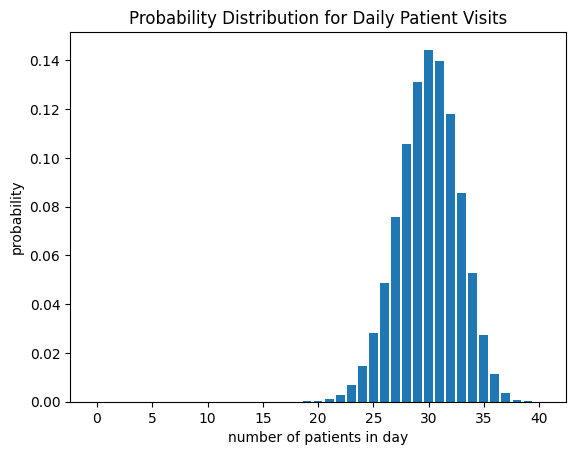

In [28]:

# defining the range of values for patients showing up to appointment in a given day given 40 patients
r_values = list(range(int(x) + 1))

# generating the "dist" variable containing all pmf values
dist = [binom.pmf(r, x, prob) for r in r_values]

# Plotting the graph. Do not change. Used for grading
plt.bar(r_values, dist)
plt.xlabel('number of patients in day')
plt.ylabel('probability')
plt.title('Probability Distribution for Daily Patient Visits')

###### Next, we use scipy.stats.binom package to get more insight into the situation. We find the cumulative density function to statistically calculate how much (in percent) will the physician be overbooked if we use the linear calculations from the first step to overbook patients.

In [18]:

#linear prediction parameters
linearPrediction = 40
workload = 30
prob = 0.75

# Finding the probability of an "optimal" day where 30 or less patients would show up from the 40 bokked
optimal = binom.cdf(workload, linearPrediction, prob)

# Finding the probability of an "overworked" where more than 30 patients show up to their appointments
overworked = 1 - optimal
print(f'Probability of having an optimal day: {optimal}')
print(f'Probability of having an overworked day: {overworked}')

Probability of having an optimal day: 0.560460268327467
Probability of having an overworked day: 0.439539731672533


###### Finally, we use the binomial ppf() function to determine the number of appointments the physician should book in order to limit the risk of having more than 30 appointments per day to 5%

In [41]:
workload =30
prob = 0.75
#Target amount of overbooked patients
target = 0.05

#Total Number of Patients to book"
total = workload + binom.ppf(target,workload,1-prob)
print(total)



34.0
